In [45]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

%matplotlib inline

In [62]:
class Xperiment(object):
    
    N_PPL = 100
    N_DOLLARS = 100
    N_TICKS = 1
    
    def __init__(self):
        self.balances = [self.N_DOLLARS] * self.N_PPL
    
    def settle_tick(self, gives_to):
        for from_, to_ in enumerate(gives_to):
            if to_ is None:
                continue
            self.balances[from_] -= 1
            self.balances[to_] += 1
    
    def tick(self):
        gives_to = []
        for person, balance in enumerate(self.balances):
            if balance > 0:
                gives_to.append(np.random.choice(self.N_PPL))
            else:
                gives_to.append(None)
        else:
            self.settle_tick(gives_to)
    
    def run(self):
        for i in range(self.N_TICKS):
            self.tick()
    
    def plot(self, sort=True):
        y = pd.Series(sorted(self.balances) if sort else self.balances)
        ax = y.plot(kind='bar', figsize=(20, 5))
        ax.set(title='SITUATION AFTER {} TICKS'.format(self.N_TICKS))

# 1 EXPERIMENT

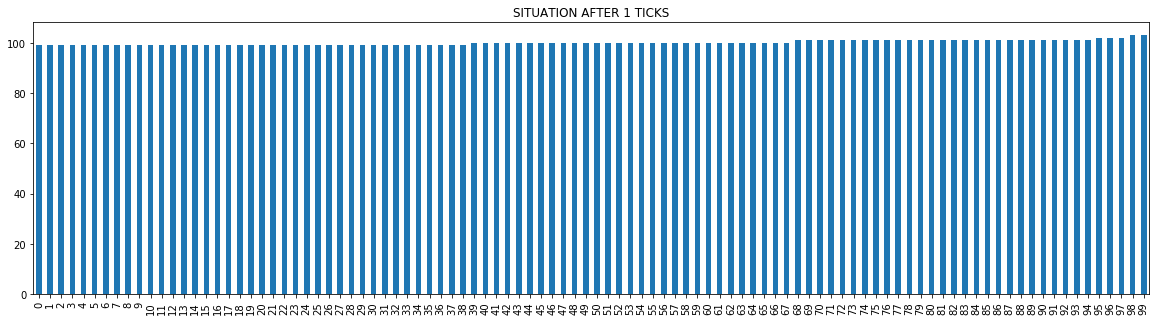

In [61]:
x = Xperiment()
x.run()
x.plot()

# 1000 EXPERIMENTS

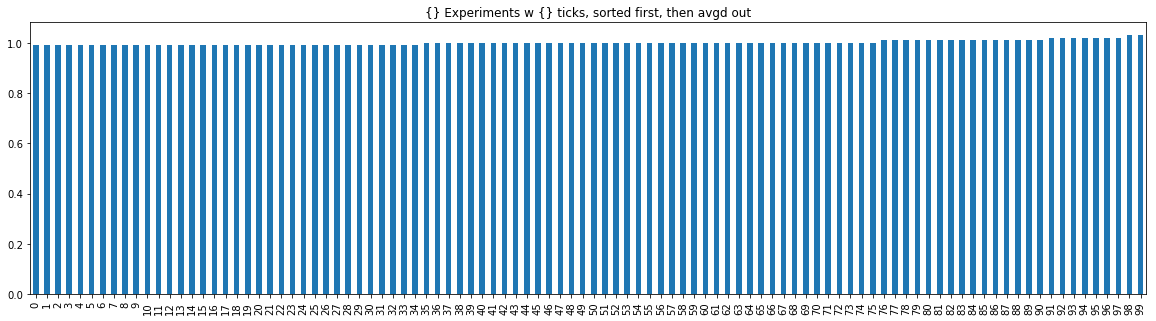

In [66]:
N_MC = 100

ys = pd.Series()
for i in range(N_MC):
    x = Xperiment()
    x.run()
    ys = pd.Series(sorted(x.balances))
    
ys /= N_MC
ax = ys.plot(kind='bar', figsize=(20, 5))
ax.set_title('{} Experiments w {} ticks, sorted first, then avgd out');